# 3.1 Two Examples

### Setup

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import mpmath
import matplotlib.pyplot as plt
from matplotlib import rc

Load student data

In [3]:
scores = pd.read_csv("../data/student_score.txt", delimiter=" ")

In [4]:
scores.head()

,mech,vecs,alg,analy,stat
0,7,51,43,17,22
1,44,69,53,53,53
2,49,41,61,49,64
3,59,70,68,62,56
4,34,42,50,47,29


### Correlation between `mechanics` and `vectors`

In [5]:
corr = scores.corr()
theta_hat = corr.loc["mech", "vecs"]
print("theta_hat = {:>0.3f}".format(theta_hat))

theta_hat = 0.498


### Calculating posteriors for Figure 3.2

$
\begin{aligned}
    f_\theta(\hat{\theta})
    &= \frac{(n - 2)(1 - \theta^2)^{(n - 1) / 2}(1 - \hat{\theta}^2)^{(n - 4)/2}}{\pi} \int_0^\infty \frac{dw}{(\cosh w - \theta \hat{\theta})^{n - 1}} \\
    &= \frac{20}{\pi} (1 - \theta^2)^{10.5}(1 - \hat{\theta}^2)^9 \int_0^\infty \frac{dw}{(\cosh w - \theta \hat{\theta})^{21}}
\end{aligned}
$

We want to graph the posterior, $ \displaystyle g(\mu | x) = \frac{ g(\mu) f_\mu(x) }{ f(x) }$ with $ \displaystyle f(x) = \int_\Omega f_\mu(x)g(\mu) d\mu $

For each prior, we'll first find the denominator, $f(x)$, or in our case, $f(\hat{\theta})$ (with $\hat{\theta}$ plugged in). Then we'll create a function that calculates the posterior for any value of $\theta$.

#### Flat prior

$ g(\theta) = \frac{1}{2}$ for $ -1 \leq \theta \leq 1 $

Denominator of the posterior

$
\begin{aligned}
f(\hat{\theta})
&= \int_{-1}^1 \frac{10}{\pi} (1 - \theta^2)^{10.5}(1 - \hat{\theta}^2)^9 \int_0^\infty \frac{dw}{(\cosh w - \theta \hat{\theta})^{21}} d\theta \\
&= \int_{-1}^1 \int_0^\infty \frac{10 (1 - \theta^2)^{10.5}(1 - \hat{\theta}^2)^9}{\pi (\cosh w - \theta \hat{\theta})^{21}} dw d\theta \\
&= \int_0^\infty \int_{-1}^1 \frac{f_\text{numer}}{f_\text{denom}} d\theta dw \\
\end{aligned}
$

In [6]:
f_numer = lambda theta, w: 10 * (1 - theta**2)**10.5 * (1 - theta_hat**2)**9
f_denom = lambda theta, w: np.pi * (mpmath.cosh(w) - theta * theta_hat)**21
f = lambda theta, w: f_numer(theta, w) / f_denom(theta, w)

In [7]:
post_denom_flat = mpmath.quad(f, [-1, 1], [0, float("inf")])
post_denom_flat = float(post_denom_flat)

Function to calculate posterior

In [8]:
def posterior_flat(theta):
    global theta_hat
    g = 0.5
    f_coef = (20 / np.pi) * (1 - theta**2)**10.5 * (1 - theta_hat**2)**9
    f_integrand = lambda w: 1 / mpmath.power(mpmath.cosh(w) - theta * theta_hat, 21)
    f_integral = mpmath.quad(f_integrand, [0, float("inf")])
    return g * f_coef * f_integral / post_denom_flat

#### Jeffrey's prior

$ g^{\text{Jeff}}(\theta) = 1 / (1 - \theta^2) $

Denominator of the posterior

$
\begin{aligned}
f(\hat{\theta})
&= \int_{-1}^1 \frac{20}{(1 - \theta^2)\pi} (1 - \theta^2)^{10.5}(1 - \hat{\theta}^2)^9 \int_0^\infty \frac{dw}{(\cosh w - \theta \hat{\theta})^{21}} d\theta \\
&= \int_{-1}^1 \int_0^\infty \frac{20(1 - \theta^2)^{9.5}(1 - \hat{\theta}^2)^9}{\pi(\cosh w - \theta \hat{\theta})^{21}} d\theta \\
&= \int_0^\infty \int_{-1}^1 \frac{f_\text{numer}}{f_\text{denom}} d\theta dw \\
\end{aligned}
$

In [9]:
f_numer = lambda theta, w: 20 * (1 - theta**2)**9.5 * (1 - theta_hat**2)**9
f_denom = lambda theta, w: np.pi * (mpmath.cosh(w) - theta * theta_hat)**21
f = lambda theta, w: f_numer(theta, w) / f_denom(theta, w)

In [10]:
post_denom_jeff = mpmath.quad(f, [-1, 1], [0, float("inf")])
post_denom_jeff = float(post_denom_jeff)

Function to calculate posterior

In [11]:
def posterior_jeff(theta):
    global theta_hat
    g = 1 / (1 - theta**2)
    f_coef = (20 / np.pi) * (1 - theta**2)**10.5 * (1 - theta_hat**2)**9
    f_integrand = lambda w: 1 / mpmath.power(mpmath.cosh(w) - theta * theta_hat, 21)
    f_integral = mpmath.quad(f_integrand, [0, float("inf")])
    return g * f_coef * f_integral / post_denom_jeff

#### Triangular prior

$ g(\theta) = 1 - |\theta| $

Denominator of the posterior

$
\begin{aligned}
f(\hat{\theta})
& = \int_{-1}^1 \frac{20(1 - |\theta|)}{\pi} (1 - \theta^2)^{10.5}(1 - \hat{\theta}^2)^9 \int_0^\infty \frac{dw}{(\cosh w - \theta \hat{\theta})^{n - 1}} d\theta \\
&= \int_{-1}^1 \int_0^\infty \frac{20(1 - |\theta|)(1 - \theta^2)^{10.5}(1 - \hat{\theta}^2)^9}{\pi(\cosh w - \theta \hat{\theta})^{21}} d\theta \\
&= \int_0^\infty \int_{-1}^1 \frac{f_\text{numer}}{f_\text{denom}} d\theta dw \\
\end{aligned}
$

In [12]:
f_numer = lambda theta, w: 20 * (1 - np.abs(theta)) * (1 - theta**2)**10.5 * (1 - theta_hat**2)**9
f_denom = lambda theta, w: np.pi * (mpmath.cosh(w) - theta * theta_hat)**21
f = lambda theta, w: f_numer(theta, w) / f_denom(theta, w)

In [13]:
post_denom_tria = mpmath.quad(f, [-1, 1], [0, float("inf")])
post_denom_tria = float(post_denom_tria)

Function to calculate posterior

In [14]:
def posterior_tria(theta):
    global theta_hat
    g = 1 - np.abs(theta)
    f_coef = (20 / np.pi) * (1 - theta**2)**10.5 * (1 - theta_hat**2)**9
    f_integrand = lambda w: 1 / mpmath.power(mpmath.cosh(w) - theta * theta_hat, 21)
    f_integral = mpmath.quad(f_integrand, [0, float("inf")])
    return g * f_coef * f_integral / post_denom_tria

### Figure 3.2

x and y points

In [15]:
x = np.arange(-0.2, 0.99, 0.01)
y_flat = [posterior_flat(xval) for xval in x]
y_jeff = [posterior_jeff(xval) for xval in x]
y_tria = [posterior_tria(xval) for xval in x]

Make the plot

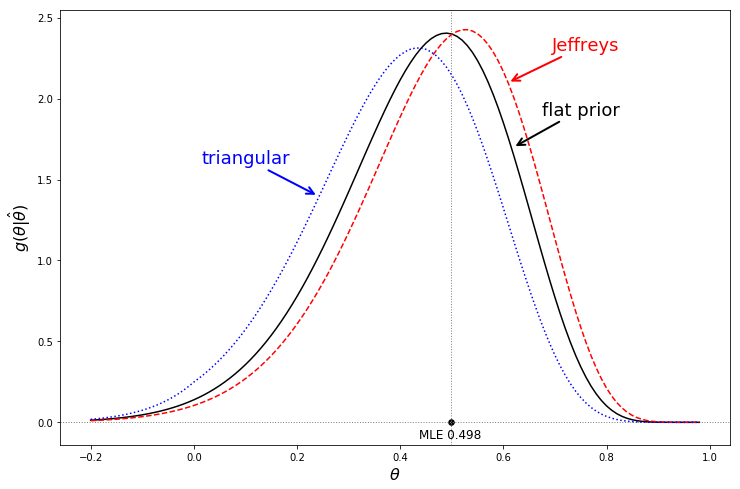

In [16]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.axhline(0, c="gray", linestyle=":", linewidth=1)
ax.axvline(theta_hat, c="gray", linestyle=":", linewidth=1)

ax.plot(x, y_flat, c="k")
ax.annotate(
    "flat prior",
    size=18,
    xy=(0.62, 1.7),
    xytext=(0.75, 1.9),
    arrowprops=dict(arrowstyle="->", linewidth=2),
    horizontalalignment="center",
)

ax.plot(x, y_jeff, c="r", linestyle="--")
ax.annotate(
    "Jeffreys",
    size=18,
    xy=(0.61, 2.1),
    xytext=(0.76, 2.3),
    arrowprops=dict(arrowstyle="->", color="r", linewidth=2),
    horizontalalignment="center",
    color="r",
)

ax.plot(x, y_tria, c="b", linestyle=":")
ax.annotate(
    "triangular",
    size=18,
    xy=(0.24, 1.4),
    xytext=(0.1, 1.6),
    arrowprops=dict(arrowstyle="->", color="b", linewidth=2),
    horizontalalignment="center",
    color="b"
)

ax.scatter([theta_hat], [0], c="k", s=30)
ax.text(
    theta_hat,
    -0.1,
    "MLE {:.3f}".format(theta_hat),
    fontsize=12,
    horizontalalignment="center",
    color="k"
)

ax.set_xlabel(r"$\theta$", size=16)
ax.set_ylabel(r"$g(\theta|\hat{\theta})$", size=16);